In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Sklearn
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report #gives whole info about matrices
from sklearn.metrics import confusion_matrix #gives diff between actual and predict
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

#NLP packages
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words

#visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

print('imported')

imported


In [5]:
import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [6]:
#loading dataset
df = pd.read_csv('dataset/phishing_site_urls.csv')
df.head(5)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [7]:
df.shape

(549346, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
df.isnull().any()

URL      False
Label    False
dtype: bool

In [10]:
label_counts = pd.DataFrame(df.Label.value_counts())
label_counts

,Label
good,392924
bad,156422


<AxesSubplot:ylabel='Label'>

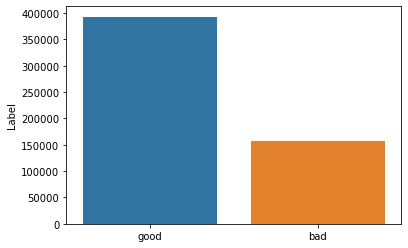

In [11]:
sns.barplot(label_counts.index,label_counts.Label)

In [12]:
# RegexpTokenizer
#It is used in NLP for dividing paragraph into sentences and sentences to words

tokenizer = RegexpTokenizer(r'[A-Za-z]+')
df['URL'][0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [13]:
# this will be pull letter which matches to expression
tokenizer.tokenize(df['URL'][0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [14]:
import time
print("Getting words tokenized...")
t0=time.time()
df['text_tokenized']=df.URL.map(lambda t: tokenizer.tokenize(t))
t1=time.time() -t0
print(f"Time taken {round(t1,2)} seconds")

Getting words tokenized...
Time taken 11.18 seconds


In [15]:
df.sample(5)

,URL,Label,text_tokenized
333477,factbites.com/topics/1969-Canadian-Grand-Prix,good,"[factbites, com, topics, Canadian, Grand, Prix]"
208690,local.yahoo.com/info-12375071-veterans-of-fore...,good,"[local, yahoo, com, info, veterans, of, foreig..."
329782,facebook.com/pages/LuFisto/110808422273772,good,"[facebook, com, pages, LuFisto]"
77323,www.activestate.com/activeperl/,good,"[www, activestate, com, activeperl]"
333709,failsafe.ca/geek_page.php,good,"[failsafe, ca, geek, page, php]"


In [16]:
# Snowball is a small string processing language, gives root words
# root words means ex. University,universal,universestar here universe is root word
# and also removes of,and,is,was,are,I
#snow ball is package for give root word for multiple language
stemmer = SnowballStemmer("english") 

In [17]:
print("Getting words stemmed....")
t2=time.time()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t3 = time.time()-t2
print(f"Time taken {round(t3,2)} seconds")

Getting words stemmed....
Time taken 161.57 seconds


In [18]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
51824,www.badgecity.com/mub,good,"[www, badgecity, com, mub]","[www, badgec, com, mub]"
495834,garnelenfarm.net/xukwj4,bad,"[garnelenfarm, net, xukwj]","[garnelenfarm, net, xukwj]"
77439,www.digitaljunkies.ca/dompdf/,good,"[www, digitaljunkies, ca, dompdf]","[www, digitaljunki, ca, dompdf]"
460969,voanews.com/english/news/africa/southern/Malem...,good,"[voanews, com, english, news, africa, southern...","[voanew, com, english, news, africa, southern,..."
5753,lldmbrooklyn.org/paypal_virefication/79b40e98d...,bad,"[lldmbrooklyn, org, paypal, virefication, b, e...","[lldmbrooklyn, org, paypal, viref, b, e, d, fd..."


In [19]:
#joining stemmed words
print("Getting joining words")
t4=time.time()
df['text_from_url'] = df['text_stemmed'].map(lambda i:' '.join(i))
t5=time.time()-t4
print(f"Time taken {round(t5,2)} seconds")

Getting joining words
Time taken 0.99 seconds


In [20]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_from_url
538806,econopaginas.com/jxifdhv/,bad,"[econopaginas, com, jxifdhv]","[econopagina, com, jxifdhv]",econopagina com jxifdhv
210090,lyrics.wikia.com/Common:The_Corner,good,"[lyrics, wikia, com, Common, The, Corner]","[lyric, wikia, com, common, the, corner]",lyric wikia com common the corner
363610,islamophobia-watch.com/islamophobia-watch/2011...,good,"[islamophobia, watch, com, islamophobia, watch...","[islamophobia, watch, com, islamophobia, watch...",islamophobia watch com islamophobia watch fres...
5886,johnstews.tumblr.com/,bad,"[johnstews, tumblr, com]","[johnstew, tumblr, com]",johnstew tumblr com
151825,boardreader.com/thread/Geocode_Dataflow_perfor...,good,"[boardreader, com, thread, Geocode, Dataflow, ...","[boardread, com, thread, geocod, dataflow, per...",boardread com thread geocod dataflow perform s...


In [21]:
#now we are going to visualize good and bad urls frequent keywords using wordcloud
good_sites = df[df.Label=="good"]
bad_sites = df[df.Label=="bad"]

In [22]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_from_url
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [23]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_from_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [24]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [25]:
data = good_sites.text_from_url
data.reset_index(drop=True, inplace=True)

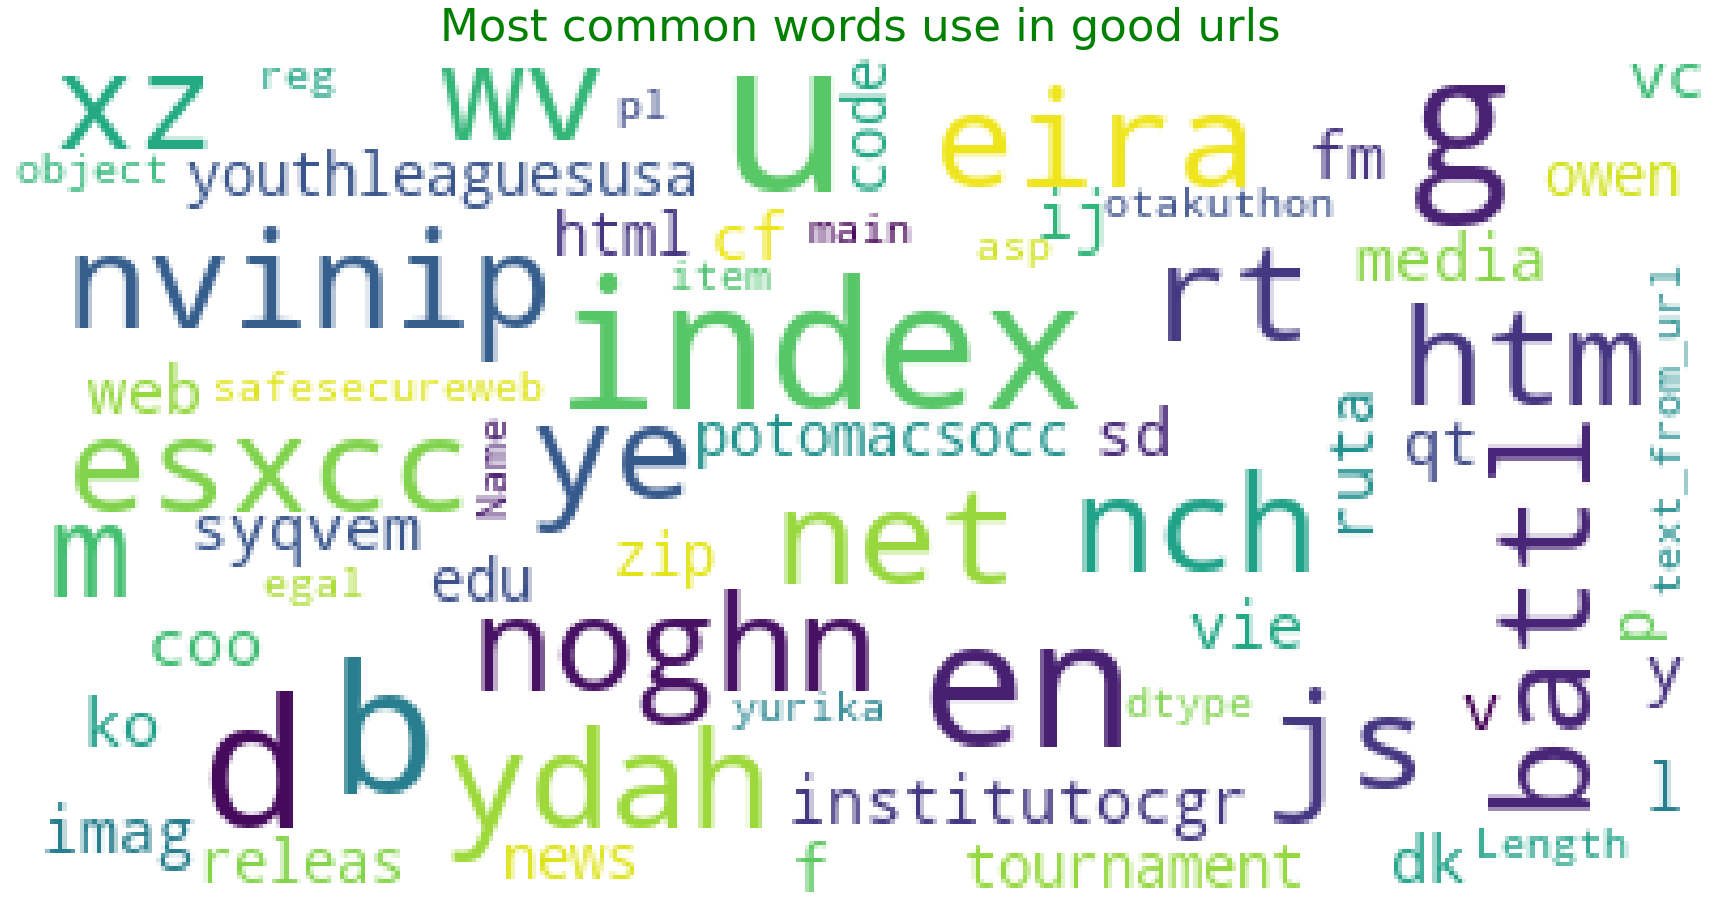

In [26]:
common_text = str(data)
plot_wordcloud(common_text, max_words=4000, max_font_size=50, 
               title = 'Most common words use in good urls', title_size=45)

In [27]:
data = bad_sites.text_from_url
data.reset_index(drop=True, inplace=True)

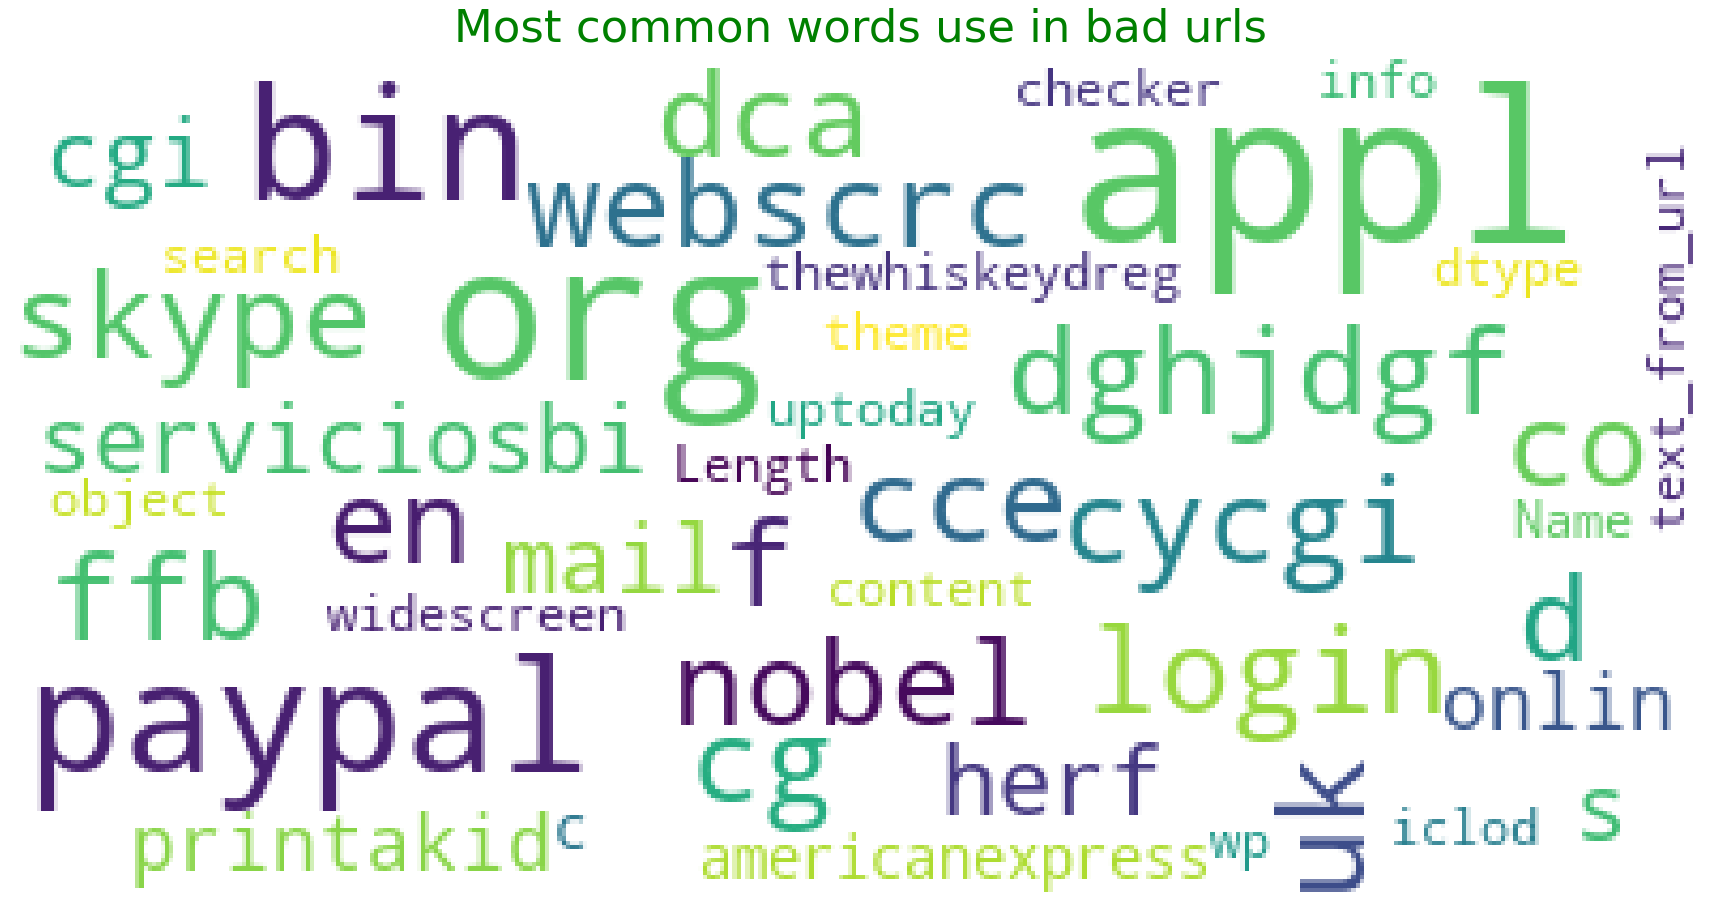

In [28]:

common_text = str(data)
plot_wordcloud(common_text, max_words=4000, max_font_size=50, 
               title = 'Most common words use in bad urls', title_size=45)

In [29]:
#Creating Model
df.head(2)

,URL,Label,text_tokenized,text_stemmed,text_from_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...


In [30]:
#here our words are mostly texts we have to convert it into numbers for that we have to convert it using
# count vectorizer - Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()

In [31]:
# help(cv)

In [32]:
feature = cv.fit_transform(df.text_from_url)
feature

<549346x350837 sparse matrix of type '<class 'numpy.int64'>'
	with 3676066 stored elements in Compressed Sparse Row format>

In [33]:
#now the above feature is stored as compressed sparse matrix , to see it,
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
#training model
X_train,X_test,y_train,y_test = train_test_split(feature,df.Label)

In [35]:

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
lr.score(X_test,y_test)

0.9649038496544995

In [37]:
#Logistic gives 96% accuraccy
print("Testing Accuracy : ",lr.score(X_test,y_test))
print("Training Accuracy : ",lr.score(X_train,y_train))

Testing Accuracy :  0.9649038496544995
Training Accuracy :  0.9788839564184277


CONFUSION MATRIX


<AxesSubplot:>

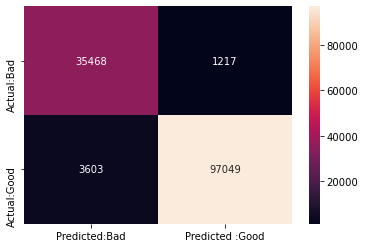

In [38]:
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test), y_test),
                            columns = ['Predicted:Bad', 'Predicted :Good'],
                            index = ['Actual:Bad','Actual:Good'])
print("CONFUSION MATRIX")
sns.heatmap(con_mat,annot = True,fmt='d')

In [39]:
print("CLASSIFICATION REPORT")
report = classification_report(lr.predict(X_test), y_test,
                            target_names =['Bad','Good'])
print(report)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36685
        Good       0.99      0.96      0.98    100652

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.97    137337



In [40]:
#pipeline is for automating model training

pipeline_ls = make_pipeline(
    CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'),
    LogisticRegression()
)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(df.URL,df.Label,test_size=0.2)

In [42]:
pipeline_ls.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [43]:
pipeline_ls.score(X_test,y_test)

0.967306817147538

Training Accuracy : 0.9814301577333006
Testing Accuracy : 0.967306817147538

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     29577
        Good       0.99      0.97      0.98     80293

    accuracy                           0.97    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.97      0.97    109870


CONFUSION MATRIX


<AxesSubplot:>

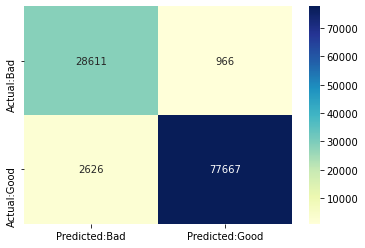

In [44]:
print('Training Accuracy :',pipeline_ls.score(X_train,y_train))
print('Testing Accuracy :',pipeline_ls.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [45]:
import pickle #to export model
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [46]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.967306817147538


In [47]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("_"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
______________________________
['good' 'good' 'good' 'good']


In [48]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php']
predict_good = ['www.google.com/']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result

array(['bad'], dtype=object)